# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- AMC Theaters CEO seeks public opinion on Shiba Inu.  Dogecoin killer, Dogecoin copycat, Shi*coin etc. were a few names given to Shiba Inu, the new hype in the crypto-verse. It is no secret that there have been multiple projects in the cryptocurrency space that saw momentary hype but faded away in time. The market has similar expectations from Shiba but not before making use [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/amc-theaters-ceo-seeks-public-opinion-on-shiba-inu/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Supreme Court declines to block vaccine mandate for health workers in Maine.  The Supreme Court declined Friday to block Maine's requirement for health care workers to receive a Covid-19 vaccination, even though it doesn't contain a religious exemption. ... [| Skaityti daugiau](https://www.nbcnews.com/politics/supreme-court/supreme-court-declines-block-vaccine-mandate-health-workers-maine-n1282757) 

### Kainų kaita pandemijos metu

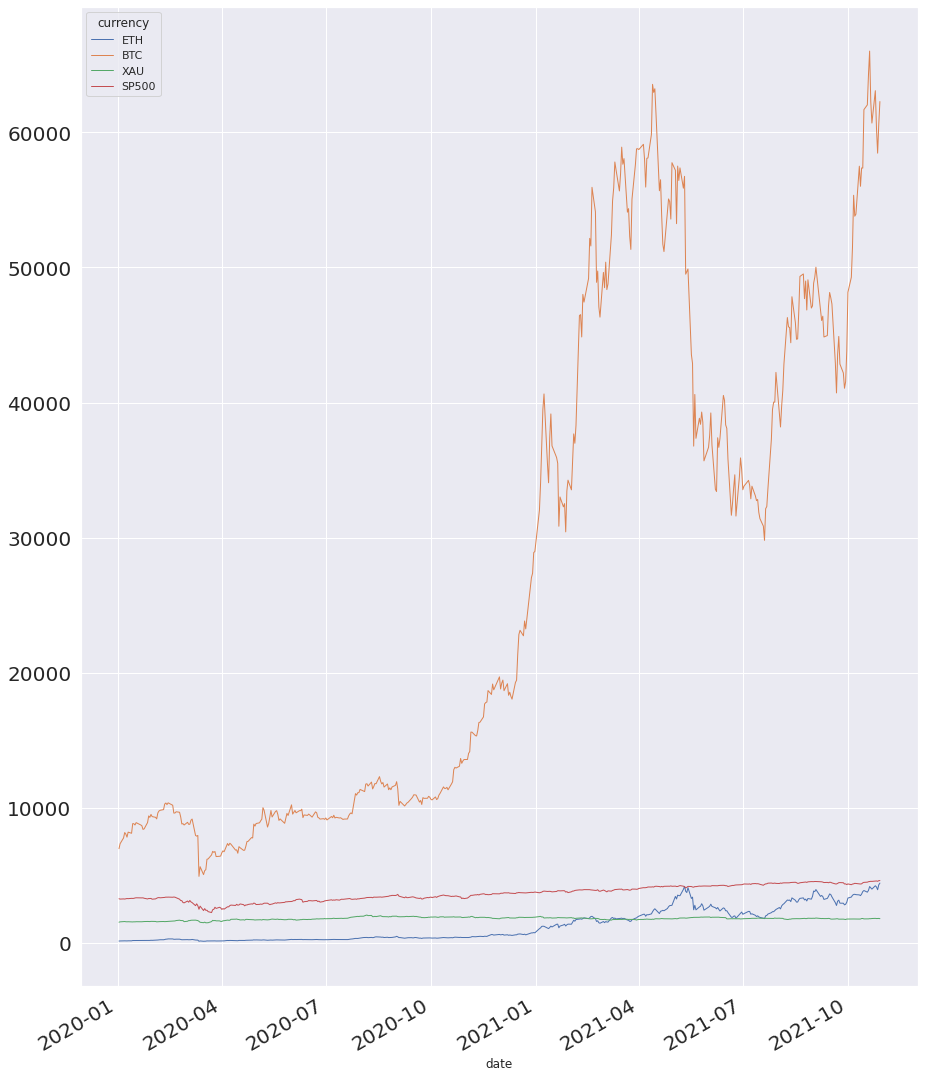

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.899873,0.143114,0.898781
BTC,0.899873,1.000000,0.117651,0.860067
XAU,0.143114,0.117651,1.000000,0.308606
SP500,0.898781,0.860067,0.308606,1.000000


In [8]:
#hide ### Koreliacijos matrica.

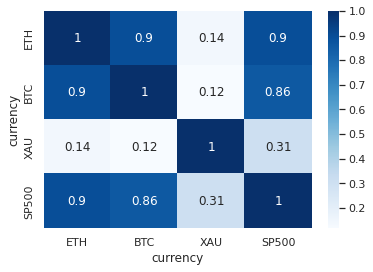

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')